# Stock Analysis of Recession Resilient Companies

## Introduction

#### The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns
    output = df.stack(level=-1)
    return output

In [3]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    for x in mytickers_name:      
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()
        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(9,5))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
        output = data_ticker_attributes.describe()
    return output

In [13]:
#Function taking as input companies, date range and output stock returns
#Calculate daily returns of each stock (Difference/og Price or Log(D/OG))
def stockreturns(data_pack, type_return):
    adjclose = pd.DataFrame(data_pack['Adj Close'])
    adjclose = adjclose.unstack()
    #if loop for log or relative
    if type_return == 'log' or 'logarithm':
        adjclose_ret = np.log(adjclose).diff()
    else:
        adjclose_ret = adjclose.pct_change()
    output = print(adjclose_ret)
    return adjclose_ret

In [11]:
#Cumulative return plot
#Daily return plot
def return_plot(dataframe, type_plot):
    if type_plot == 'cumulative':
        cumulative_return = dataframe.cumsum
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(cumulative_ret)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Cumulative Returns")
        ax1.set_title("Portfolio Cumulative Returns")
        plt.show();
    else:
        fig = plt.figure()
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.plot(dataframe)
        ax1.set_xlabel('Date')
        ax1.set_ylabel("Cumulative Returns")
        ax1.set_title("Portfolio Cumulative Returns")
        plt.show();

## Resilient Companies

#### Companies that survive recessions tend to have basic necessities needed by consumers. This is because consumer staples and food are always in demand, even during economic downturns. Examples of such companies the likes of Walmart, Kroger and General Mills

           Adj Close                                                  
Symbols        ^GSPC       WMT        KR       GIS       HRL       CPB
Date                                                                  
2007-12-03       NaN       NaN       NaN       NaN       NaN       NaN
2007-12-04 -0.006562  0.006663 -0.020987 -0.001168  0.012787  0.001907
2007-12-05  0.015076  0.014626 -0.001415  0.008644 -0.002994  0.001360
2007-12-06  0.014925  0.007538 -0.004257  0.011191  0.001498  0.004881
2007-12-07 -0.001780 -0.005087  0.009200 -0.009538  0.004233  0.000541
...              ...       ...       ...       ...       ...       ...
2009-06-24  0.006503  0.003303  0.004128  0.002363  0.000879  0.012448
2009-06-25  0.021218  0.013107  0.022178  0.015672  0.005839  0.014330
2009-06-26 -0.001479 -0.010636  0.001789 -0.012047  0.003487  0.000339
2009-06-29  0.009024  0.002670 -0.006725  0.010079  0.010103  0.005403
2009-06-30 -0.008567 -0.006584 -0.008130  0.003218 -0.008074 -0.009136

[397 

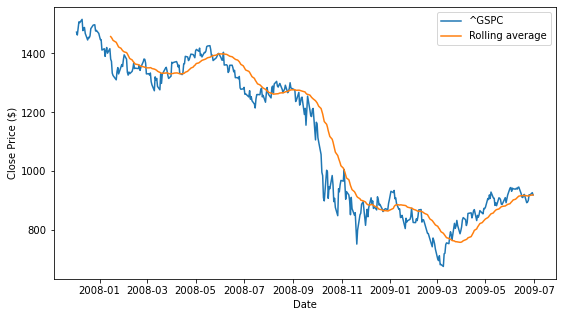

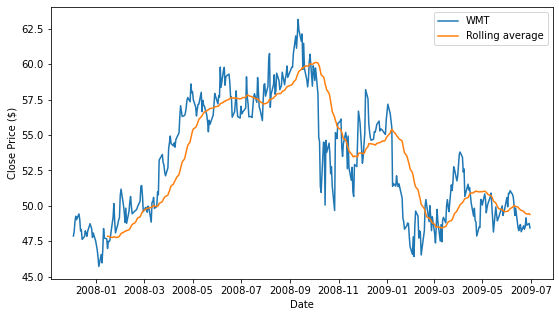

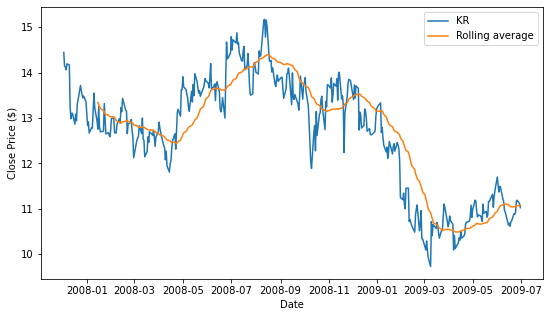

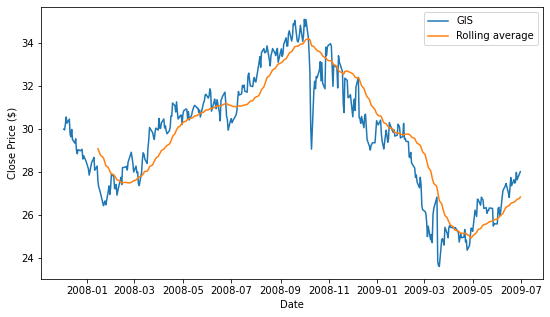

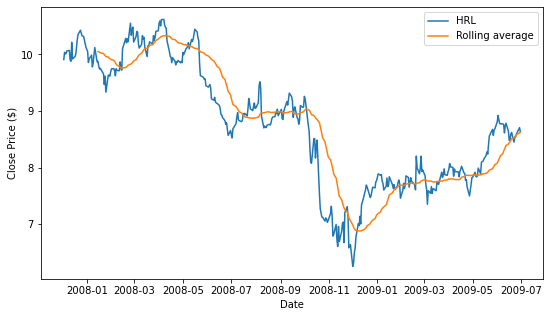

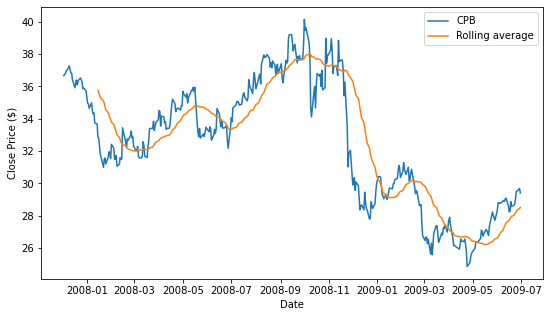

In [14]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)
pickmydata(data_pack, "Close", 30)
data_plot = stockreturns(data_pack, 'relative')

#### Calculating returns and visualizing the data. We are able to see a a much more consistent return in the companies deemed resilient than those whose stock price was deemed more volatile.

In [15]:
return_plot(data_plot, 'cumulative')

NameError: name 'adjclose_ret' is not defined

#### Looking for trends, we can see that retail company stocks would hit a dip during the recession, but the precentage of the dip would be less extreme than that of the S&P.

## Sensitive Companies

#### Companies that tend to perform terribly are those who depend on consumers being able to afford big ticket item, such as cars, housing and plane tickets. The reasons depend on the industry, for example, though the car industry is quickly  becoming a necessity, are quite expensive and that alone makes the demand for them fall during economic downturns.

count    397.000000
mean       7.024861
std        3.975925
min        1.760000
25%        3.600000
50%        6.800000
75%        8.750000
max       19.930000
Name: Close, dtype: float64

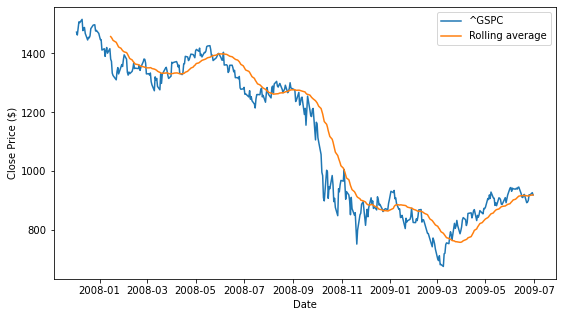

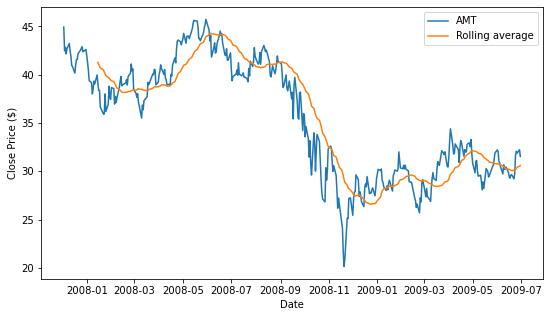

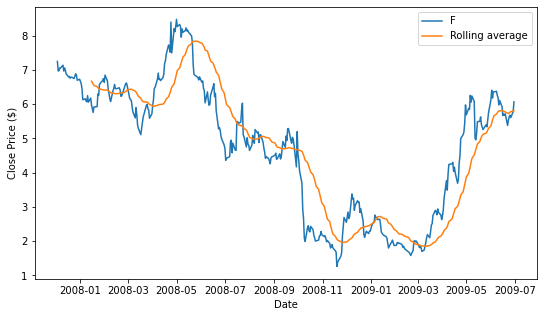

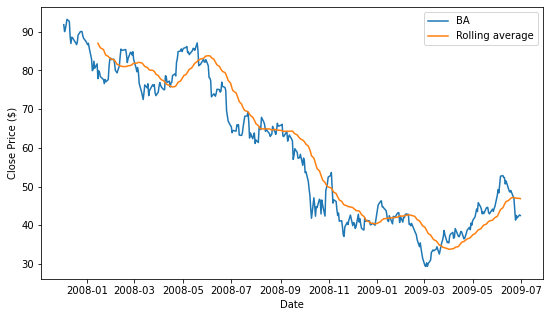

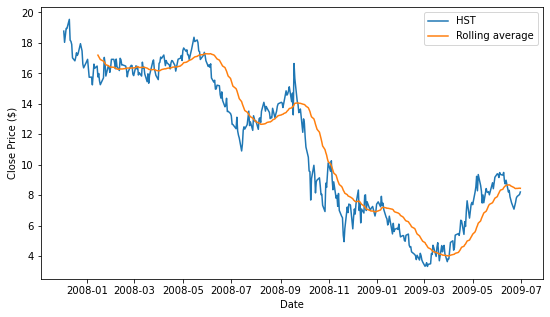

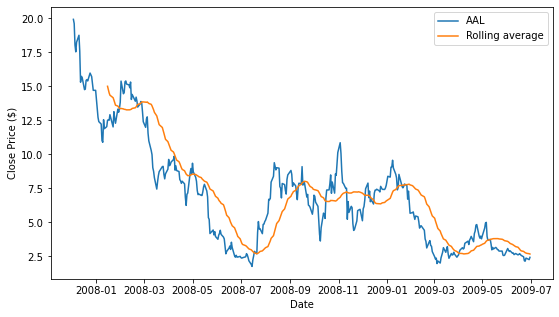

In [8]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')
#data_pack.head(10)
pickmydata(data_pack, "Close", 30)

#### These companies have got a dip that is either as sharp or worse than the S&P 500. Unlike the discount retail companies, the industries that these commpanies belong to rely on consumer spending large amounts of money, a feature that is stressed during economic downturns.